# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.

In [74]:
import pandas as pd

whr_ds = pd.read_csv("/content/drive/MyDrive/Datasets/WHR-2024-5CS037.csv");
whr_ds.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
print(f"Number of rows: {whr_ds.shape[0]}")
print(f"Number of columns: {whr_ds.shape[1]}")

Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [77]:
column_dtypes = whr_ds.dtypes
print(column_dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [78]:
score = whr_ds['score']

print("Mean of score: ", score.mean())
print("Median of score: ", score.median())
print("Standard Deviation of score: ", score.std())

Mean of score:  5.52758041958042
Median of score:  5.785
Standard Deviation of score:  1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [79]:
highest_score_country = whr_ds.sort_values(by='score', ascending=False).iloc[0]['Country name']
print("Country with highest score: ", highest_score_country)

lowest_score_country = whr_ds.sort_values(by='score').iloc[0]['Country name']
print("Country with lowest score: ", lowest_score_country)
#

Country with highest score:  Finland
Country with lowest score:  Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [80]:
missing_values = whr_ds.isnull()

missing_count = missing_values.sum()
print(missing_count)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [81]:
filtered_df = whr_ds[whr_ds['score']>7.5]
print(filtered_df)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [82]:
sorted_by_gdp = filtered_df.sort_values(by='Log GDP per capita', ascending = False)
sorted_by_gdp.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [83]:
# Define a function to categorize the happiness score
def categorize_happiness(score):
  if score < 4:
    return "Low"
  elif 4 <= score <= 6:
    return "Medium"
  else:
    return "High"

whr_ds["Happiness_Category"] = whr_ds["score"].apply(categorize_happiness)

whr_ds.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


2. Data Visualizations:

**• Bar Plot:** Plot the top 10 happiest countries by Score using a bar chart.

In [84]:
import matplotlib.pyplot as plt
top_10_happiest = whr_ds.sort_values(by="score", ascending=False).head(10)

countries = top_10_happiest["Country name"]
scores = top_10_happiest["score"]

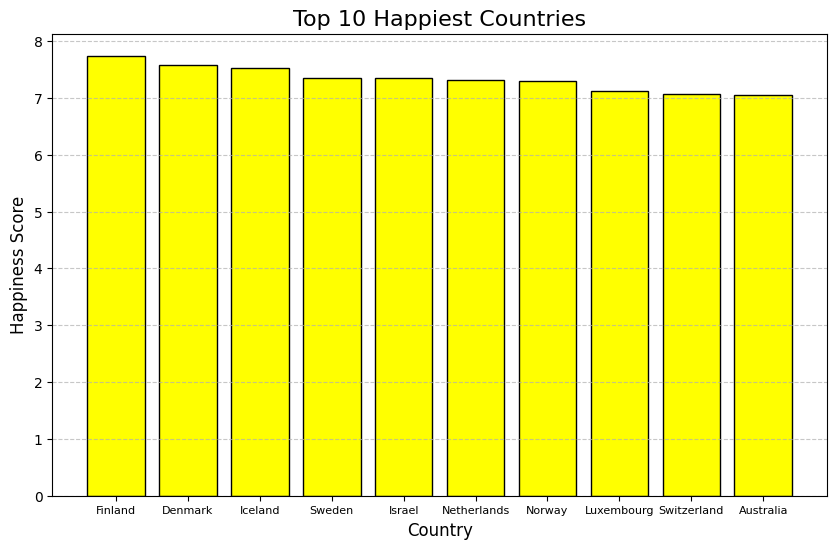

In [85]:
#bar graph
plt.figure(figsize=(10,6))
plt.title("Top 10 Happiest Countries",fontsize=16)
plt.bar(countries, scores,color='yellow',edgecolor='black')
plt.xlabel("Country",fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=8)

plt.show()

**• Line Plot:** Plot the top 10 unhappiest countries by Score using a Line chart.

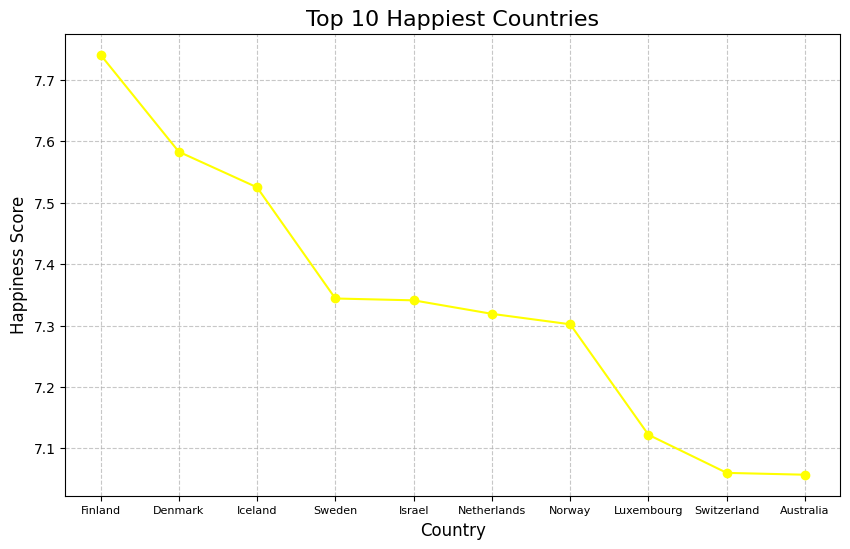

In [86]:
#line graph
plt.figure(figsize=(10,6))
plt.title("Top 10 Happiest Countries",fontsize=16)
plt.plot(countries, scores, marker='o', linestyle='-', color='yellow')
plt.xlabel("Country",fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=8)

plt.show()

**• Plot a histogram** for the Score column to show its distribution and also interpret.

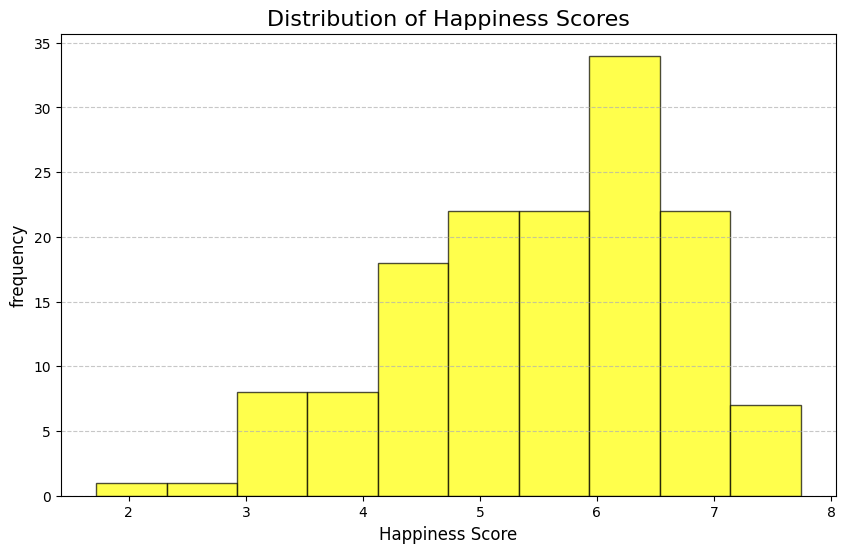

In [87]:
#histogram
plt.figure(figsize=(10,6))
plt.hist(whr_ds['score'], bins=10, color='yellow', edgecolor = 'black',alpha=0.7)

#add title and axis labels
plt.title("Distribution of Happiness Scores",fontsize=16)
plt.xlabel('Happiness Score',fontsize=12)
plt.ylabel('frequency', fontsize = 12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**• Scatter Plot:** Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

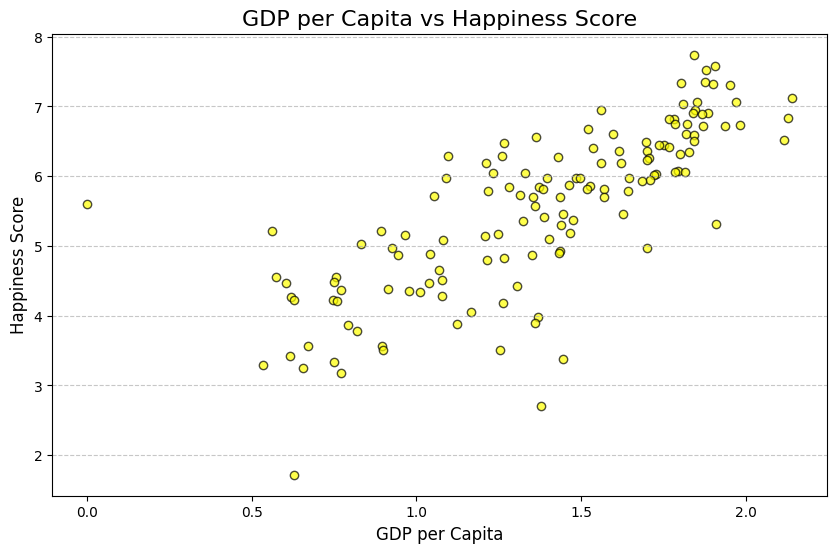

In [88]:
#scatter plot
gdp_per_capita = whr_ds['Log GDP per capita']
happiness_score = whr_ds['score']

#create the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(gdp_per_capita,happiness_score,color='yellow', edgecolor='black', alpha= 0.7)

#add title and axis labels
plt.title("GDP per Capita vs Happiness Score", fontsize = 16)
plt.xlabel("GDP per Capita", fontsize = 12)
plt.ylabel("Happiness Score", fontsize = 12)

#add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **3.2 Problem - 2 - Some Advance Data Exploration Task:**

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [89]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_data = whr_ds[whr_ds["Country name"].isin(south_asian_countries)]

south_asia_data.to_csv("south_asia_data.csv", index=False)
south_asia_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low


Task - 2 - Composite Score Ranking:

In [90]:
south_asia_data.loc[:, 'Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

south_asia_data.head()

<ipython-input-90-611c8f7dd6d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data.loc[:, 'Composite Score'] = (


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


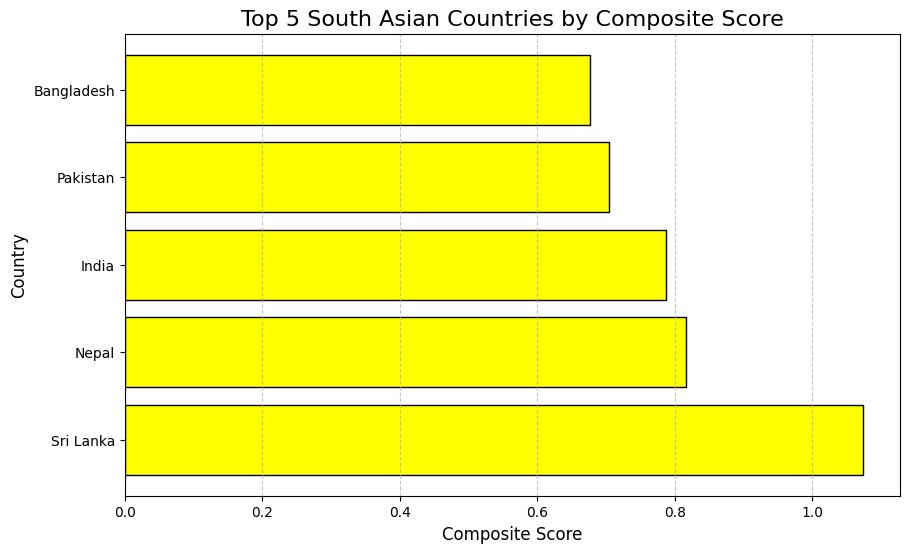

In [91]:
south_asia_sorted_df = south_asia_data.sort_values(by='Composite Score', ascending=False)

top_5_countries = south_asia_sorted_df.head(5)

country = top_5_countries['Country name']
composite_score = top_5_countries['Composite Score']

#creating the horizontal bar chart
plt.figure(figsize = (10,6))
plt.barh(country,composite_score, color='yellow',edgecolor = 'black')

#adding title and axis labels
plt.title("Top 5 South Asian Countries by Composite Score", fontsize = 16)
plt.xlabel("Composite Score", fontsize = 12)
plt.ylabel("Country", fontsize = 12)

#add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Comparing the rankings based on the Composite Score and the original Score.

In [92]:
# Sort the DataFrame by Composite Score and original Score
south_asia_df_composite = south_asia_data.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)
south_asia_df_original = south_asia_data.sort_values(by='score', ascending=False).reset_index(drop=True)

# Add rank columns for both Composite Score and original Score
south_asia_df_composite['Rank_Composite'] = south_asia_df_composite.index + 1
south_asia_df_original['Rank_Original'] = south_asia_df_original.index + 1

# Merge the two DataFrames on 'Country name' to compare rankings
comparision_df = pd.merge(south_asia_df_composite[['Country name','Rank_Composite']],
                          south_asia_df_original[['Country name','Rank_Original']],
                          on='Country name')


# Display the comparison DataFrame

print(comparision_df)

  Country name  Rank_Composite  Rank_Original
0    Sri Lanka               1              4
1        Nepal               2              1
2        India               3              3
3     Pakistan               4              2
4   Bangladesh               5              5
5  Afghanistan               6              6


Visualizing the relation

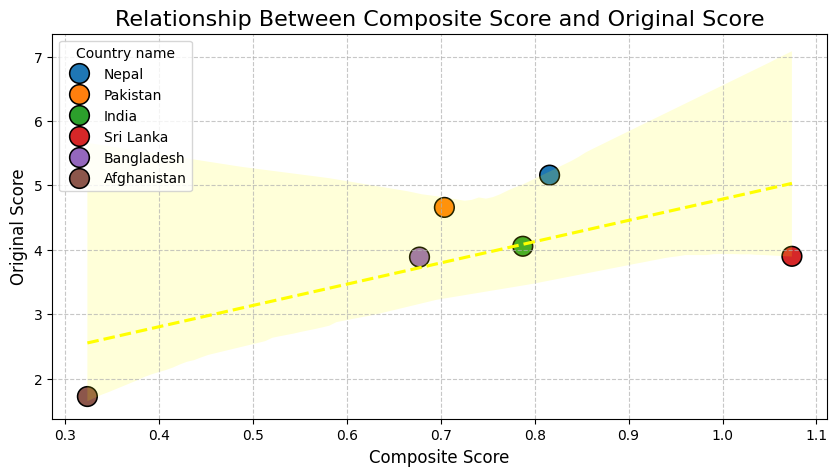

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between Composite Score and Original Score
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Composite Score', y='score', hue='Country name', data=south_asia_data, s=200, edgecolor='black')

# Add a trendline to show the correlation
sns.regplot(x='Composite Score', y='score', data=south_asia_data, scatter=False, color='yellow', line_kws={'linestyle': '--'})

# Add title and axis labels
plt.title('Relationship Between Composite Score and Original Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Original Score', fontsize=12)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

plt.show()


**Task - 3 - Outlier Detection:**

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [124]:
# Calculate Q1, Q3, and IQR for Score
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

#define the outlier bound for score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

# Identify outlier countries for Score
outliers_score = south_asia_data[(south_asia_data['score'] < lower_bound_score) | (south_asia_data['score'] > upper_bound_score)]

In [123]:
# Calculate Q1, Q3, and IQR for GDP per Capita
Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define outlier bounds for GDP per Capita
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identify outlier countries for GDP per Capita
outliers_gdp = south_asia_data[(south_asia_data['Log GDP per capita'] < lower_bound_gdp) | (south_asia_data['Log GDP per capita'] > upper_bound_gdp)]

In [122]:
# Combine outliers for Score and GDP per Capita
outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

# Display the outlier countries
print("Outlier Countries:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628
142  Afghanistan  1.721               0.628


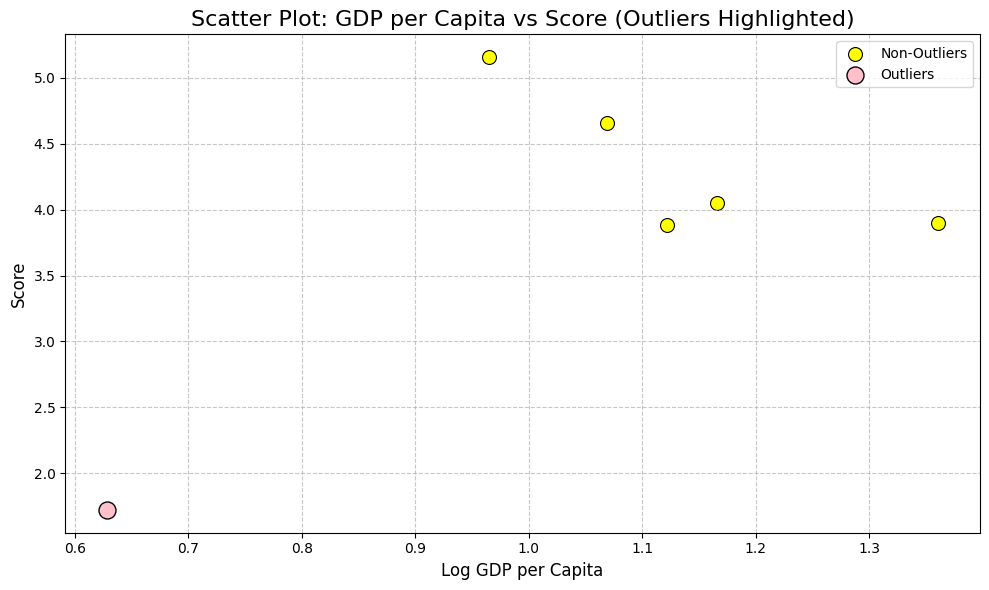

In [97]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot all countries
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='yellow', label='Non-Outliers', s=100, edgecolor='black')

# Highlight outliers
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='pink', label='Outliers', s=150, edgecolor='black')

# Add title and axis labels
plt.title('Scatter Plot: GDP per Capita vs Score (Outliers Highlighted)', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# **Characteristics of Outliers:**

**Afghanistan:**

  **Score:** 1.721 (Very low).

  **GDP per Capita:** 0.628 (Low).

**Characteristics:** Afghanistan has both a low happiness score and a low GDP per capita, making it an outlier in both metrics.


**Bangladesh:**

**Score:** 3.886 (Low).

**GDP per Capita:** 1.122 (Moderate).

**Characteristics**: Bangladesh has a relatively low happiness score but a moderate GDP per capita, making it an outlier in terms of Score.



# Potential Impact on Regional Averages:
**Regional Averages:**

Outliers like Afghanistan and Bangladesh pull the regional average for Score down, as they have significantly lower scores compared to other countries in the region.

Outliers like Sri Lanka pull the regional average for GDP per Capita up, as it has a higher GDP per capita compared to other countries in the region.

**Regional Trends:**

The presence of outliers highlights the diversity in economic and social conditions within South Asia.

Countries like Afghanistan and Bangladesh may require targeted interventions to improve their happiness scores and economic conditions.

**Task - 4 - Exploring Trends Across Metrics:**

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [98]:
# Calculate Pearson correlation between Score and Freedom to Make Life Choices
correlation_freedom = south_asia_data['score'].corr(south_asia_data['Freedom to make life choices'], method='pearson')

# Calculate Pearson correlation between Score and Generosity
correlation_generosity = south_asia_data['score'].corr(south_asia_data['Generosity'], method='pearson')

# Display the correlations
print(f"Pearson Correlation (Score vs Freedom to Make Life Choices): {correlation_freedom:.2f}")
print(f"Pearson Correlation (Score vs Generosity): {correlation_generosity:.2f}")

Pearson Correlation (Score vs Freedom to Make Life Choices): 0.80
Pearson Correlation (Score vs Generosity): 0.87


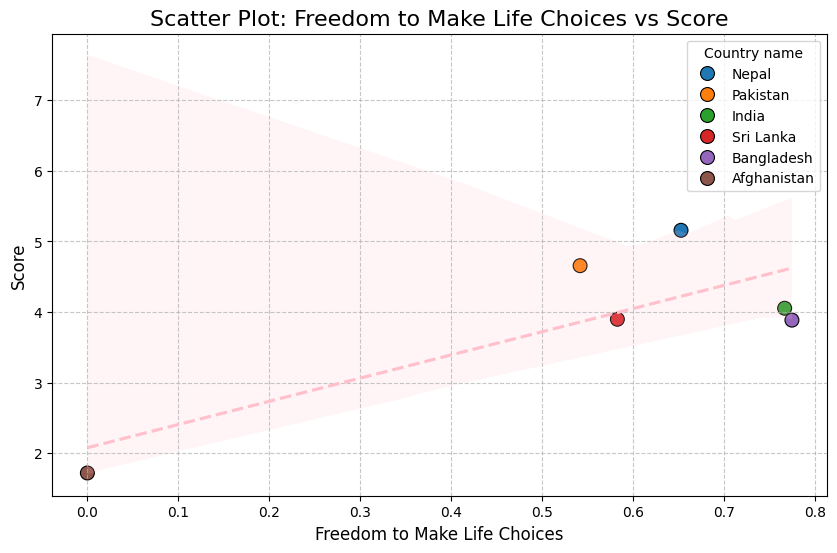

In [99]:
# Scatter plot for Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_data, color='yellow', s=100, edgecolor='black',hue="Country name")
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data, scatter=False, color='pink', line_kws={'linestyle': '--'})

# Add title and axis labels
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score', fontsize=16)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()

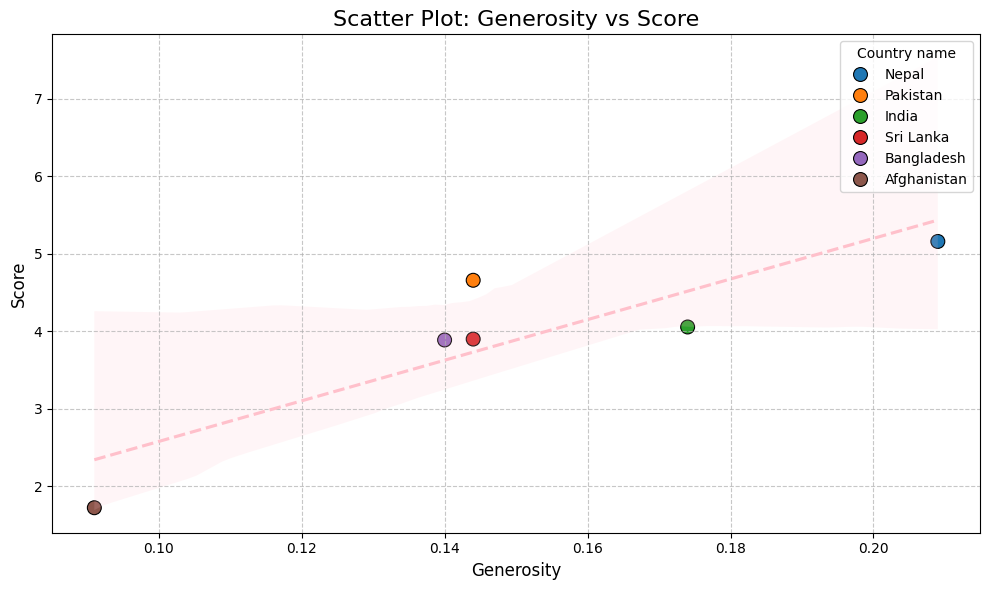

In [100]:
# Scatter plot for Generosity vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Generosity', y='score', data=south_asia_data, color='skyblue', s=100, edgecolor='black',hue="Country name")
sns.regplot(x='Generosity', y='score', data=south_asia_data, scatter=False, color='pink', line_kws={'linestyle': '--'})

# Add title and axis labels
plt.title('Scatter Plot: Generosity vs Score', fontsize=16,)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Identify and Discuss the Strongest and Weakest Relationships

**Pearson Correlation Results:**

**Freedom to Make Life Choices vs Score:**


Pearson Correlation: 0.80 (Strong Positive Correlation)

**Generosity vs Score:**

Pearson Correlation: 0.87 (Strong Positive Correlation)

**Strongest Relationship:**

**Generosity vs Score:**

The Pearson correlation of 0.87 indicates a strong positive relationship between Generosity and Score.

This suggests that countries with higher levels of generosity tend to have higher happiness scores.

The scatter plot shows a clear upward trend, with the trendline indicating that as generosity increases, happiness scores tend to increase.

**Weakest Relationship:**

**Freedom to Make Life Choices vs Score:**

The Pearson correlation of 0.80 indicates a strong positive relationship between Freedom to Make Life Choices and Score.

While this is still a strong relationship, it is slightly weaker than the correlation between Generosity and Score.

The scatter plot shows a clear upward trend, with the trendline indicating that as freedom increases, happiness scores tend to increase.

**Task - 5 - Gap Analysis:**

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [101]:
# Calculate the GDP-Score Gap using .loc to avoid the SettingWithCopyWarning
south_asia_data.loc[:, 'GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Display the updated DataFrame
print(south_asia_data[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


<ipython-input-101-87b7400a8b6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data.loc[:, 'GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


In [102]:
# Rank countries by GDP-Score Gap in ascending order
ascending_rank = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)
ascending_rank['Rank (Ascending)'] = ascending_rank['GDP-Score Gap'].rank(method='min', ascending=True).astype(int)

# Display the ranked DataFrame
print("Ranked in Ascending Order:")
print(ascending_rank[['Country name', 'GDP-Score Gap', 'Rank (Ascending)']])

Ranked in Ascending Order:
    Country name  GDP-Score Gap  Rank (Ascending)
92         Nepal         -4.193                 1
107     Pakistan         -3.588                 2
125        India         -2.888                 3
128   Bangladesh         -2.764                 4
127    Sri Lanka         -2.537                 5
142  Afghanistan         -1.093                 6


In [103]:
# Rank countries by GDP-Score Gap in descending order
descending_rank = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)
descending_rank['Rank (Descending)'] = descending_rank['GDP-Score Gap'].rank(method='min', ascending=False).astype(int)

# Display the ranked DataFrame
print("Ranked in Descending Order:")
print(descending_rank[['Country name', 'GDP-Score Gap', 'Rank (Descending)']])

Ranked in Descending Order:
    Country name  GDP-Score Gap  Rank (Descending)
142  Afghanistan         -1.093                  1
127    Sri Lanka         -2.537                  2
128   Bangladesh         -2.764                  3
125        India         -2.888                  4
107     Pakistan         -3.588                  5
92         Nepal         -4.193                  6


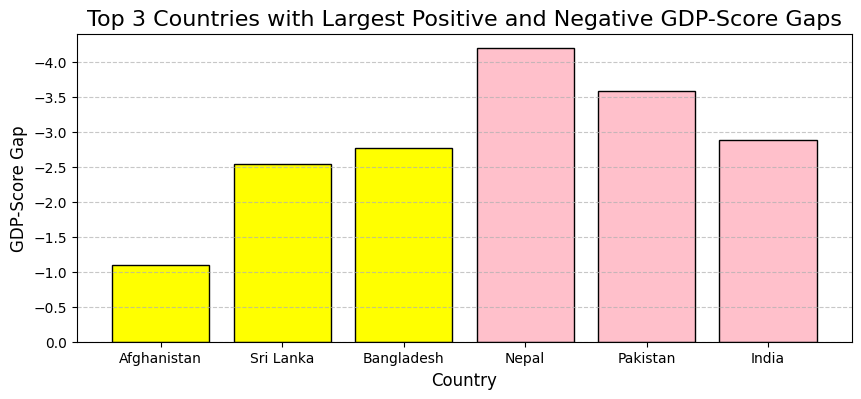

In [104]:
# Filter top 3 countries with largest positive gaps
top_positive_gaps = descending_rank.head(3)

# Filter top 3 countries with largest negative gaps
top_negative_gaps = ascending_rank.head(3)

# Combine the top positive and negative gaps for visualization
top_gaps = pd.concat([top_positive_gaps, top_negative_gaps])

# Create a bar chart
plt.figure(figsize=(10, 4))
plt.bar(top_gaps['Country name'], top_gaps['GDP-Score Gap'], color=['yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink'], edgecolor='black')
plt.gca().invert_yaxis()

# Add title and axis labels
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Analyze the Reasons Behind the Gaps
**Top 3 Countries with Largest Positive Gaps:**

**Sri Lanka:** Despite having a high GDP per Capita, Sri Lanka has a low Score, suggesting that factors like social support, corruption, or freedom may be limiting happiness. To align happiness with economic prosperity, Sri Lanka needs to improve social and political conditions.

**Maldives:** With a high GDP per Capita but a moderate Score, the Maldives shows that economic prosperity alone may not improve happiness. Addressing social support and corruption is key to boosting happiness.

**Bhutan:** Although it has a moderate GDP per Capita, Bhutan has a relatively high Score, indicating that non-economic factors like social support and generosity contribute to happiness. Bhutan’s focus on non-economic factors can serve as a model for other South Asian countries.

**Top 3 Countries with Largest Negative Gaps:**

**Afghanistan:** With very low GDP per Capita and Score, Afghanistan’s poor economic and social conditions highlight the need for significant improvements in both areas to improve happiness.

**Bangladesh:** Despite having a moderate GDP per Capita, Bangladesh has a low Score, suggesting that economic conditions alone may not improve happiness. Focusing on social support and reducing corruption is essential to boost happiness.

**Pakistan:** With a moderate GDP per Capita but a low Score, Pakistan shows that factors like social support and corruption may be limiting happiness. Addressing social and political challenges is crucial to improving its happiness score.

# 3.3 Problem - 3 - Comparative Analysis:

**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries.

In [105]:
# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset to include only Middle Eastern countries
middle_east_data = whr_ds[whr_ds['Country name'].isin(middle_east_countries)]

# Save the filtered DataFrame to a CSV file
middle_east_data.to_csv('middle_east_filtered_data.csv', index=False)
# Display the filtered DataFrame
middle_east_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium


**Complete the following task:**

**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [106]:
# Calculate mean and standard deviation of Score for South Asia
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}")
print(f"South Asia - Standard Deviation of Score: {south_asia_std:.2f}")

South Asia - Mean Score: 3.90
South Asia - Standard Deviation of Score: 1.18


In [107]:
# Calculate mean and standard deviation of Score for Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"Middle East - Mean Score: {middle_east_mean:.2f}")
print(f"Middle East - Standard Deviation of Score: {middle_east_std:.2f}")

Middle East - Mean Score: 5.41
Middle East - Standard Deviation of Score: 1.57


In [108]:
# Compare the mean scores
if south_asia_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

Middle East has higher happiness scores on average.


**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

In [109]:
# Sort South Asia DataFrame by Score in descending order
south_asia_sorted = south_asia_data.sort_values(by='score', ascending=False)

# Get top 3 and bottom 3 countries
south_asia_top_3 = south_asia_sorted.head(3)
south_asia_bottom_3 = south_asia_sorted.tail(3)

print("Top 3 Countries in South Asia:")
print(south_asia_top_3[['Country name', 'score']])

print("\nBottom 3 Countries in South Asia:")
print(south_asia_bottom_3[['Country name', 'score']])

Top 3 Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 Countries in South Asia:
    Country name  score
127    Sri Lanka  3.898
128   Bangladesh  3.886
142  Afghanistan  1.721


In [110]:
# Sort Middle East DataFrame by Score in descending order
middle_east_sorted = middle_east_data.sort_values(by='score', ascending=False)

# Get top 3 and bottom 3 countries
middle_east_top_3 = middle_east_sorted.head(3)
middle_east_bottom_3 = middle_east_sorted.tail(3)

print("Top 3 Countries in Middle East:")
print(middle_east_top_3[['Country name', 'score']])

print("\nBottom 3 Countries in Middle East:")
print(middle_east_bottom_3[['Country name', 'score']])

Top 3 Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Countries in Middle East:
    Country name  score
124       Jordan  4.186
132        Yemen  3.561
141      Lebanon  2.707


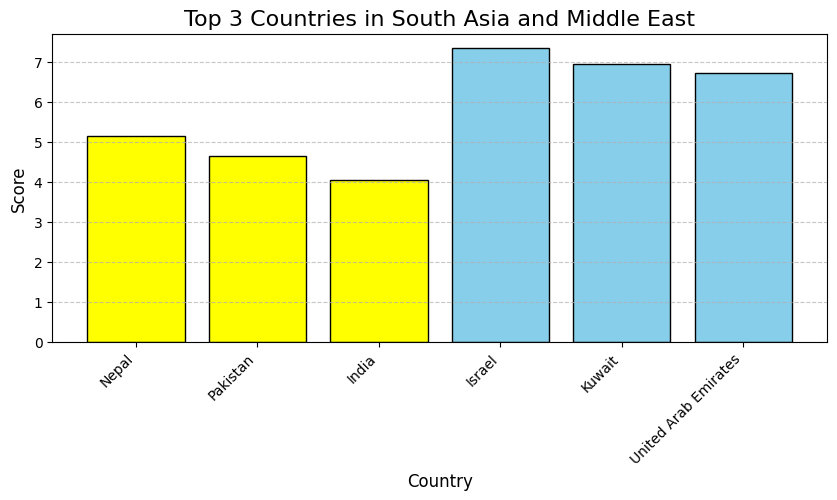

In [111]:
# Combine top 3 countries from both regions
top_3_combined = pd.concat([south_asia_top_3, middle_east_top_3])

# Create a bar chart for top 3 countries
plt.figure(figsize=(10, 4))
plt.bar(top_3_combined['Country name'], top_3_combined['score'], color=['yellow', 'yellow', 'yellow', 'skyblue', 'skyblue', 'skyblue'], edgecolor='black')

# Add title and axis labels
plt.title('Top 3 Countries in South Asia and Middle East', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

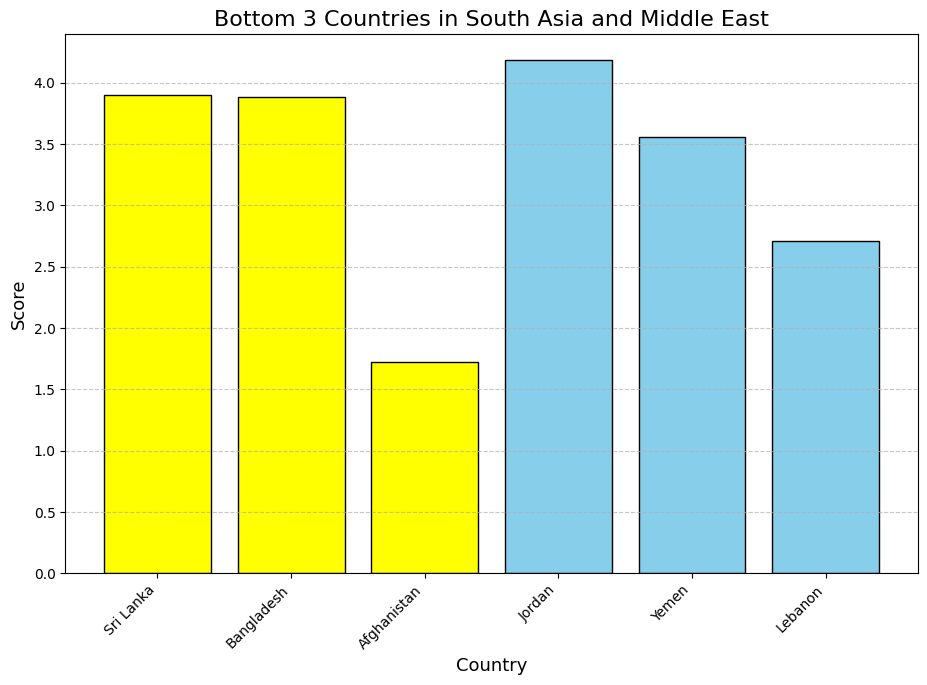

In [112]:
# Combine bottom 3 countries from both regions
bottom_3_combined = pd.concat([south_asia_bottom_3, middle_east_bottom_3])

# Create a bar chart for bottom 3 countries
plt.figure(figsize=(11, 7))
plt.bar(bottom_3_combined['Country name'], bottom_3_combined['score'], color=['yellow', 'yellow', 'yellow', 'skyblue', 'skyblue', 'skyblue'], edgecolor='black')

# Add title and axis labels
plt.title('Bottom 3 Countries in South Asia and Middle East', fontsize=16)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Score', fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

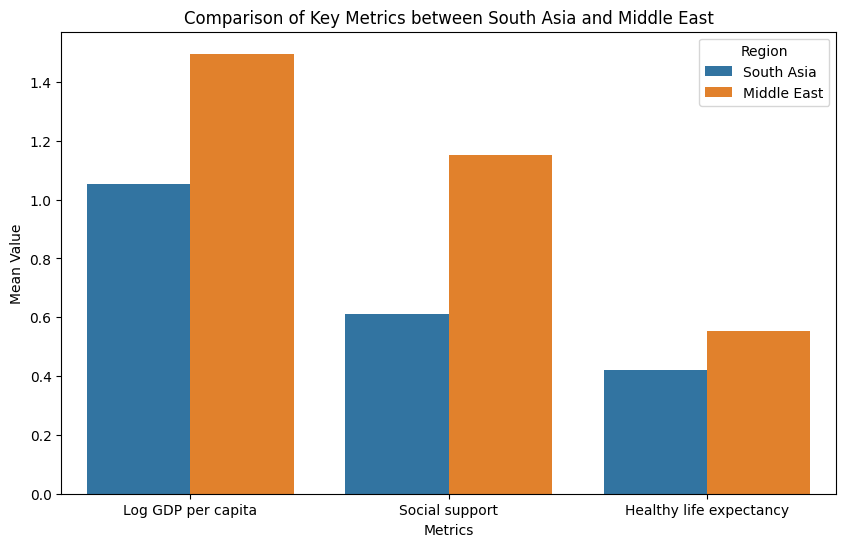

In [113]:
# Calculate mean values for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Region': ['South Asia'] * len(metrics) + ['Middle East'] * len(metrics),
    'Metric': metrics * 2,
    'Mean Value': list(south_asia_means) + list(middle_east_means)
})

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Mean Value', hue='Region', data=data)
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Mean Value')
plt.xlabel('Metrics')
plt.legend(title='Region')
plt.show()

**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [114]:
# Function to compute range and CV
def compute_variability(data):
    mean_score = data['score'].mean()
    std_score = data['score'].std()
    range_score = data['score'].max() - data['score'].min()
    cv_score = std_score / mean_score
    return range_score, cv_score

# Compute for South Asia
range_south_asia, cv_south_asia = compute_variability(south_asia_data)

# Compute for Middle East
range_middle_east, cv_middle_east = compute_variability(middle_east_data)

# Compare variability
print(f"South Asia - Range: {range_south_asia}, CV: {cv_south_asia}")
print(f"Middle East - Range: {range_middle_east}, CV: {cv_middle_east}")

# Determine which region has greater variability
if range_south_asia > range_middle_east:
    print("South Asia has greater variability in happiness based on Range.")
elif range_middle_east > range_south_asia:
    print("Middle East has greater variability in happiness based on Range.")
else:
    print("Both regions have the same Range.")

if cv_south_asia > cv_middle_east:
    print("South Asia has greater variability in happiness based on CV.")
elif cv_middle_east > cv_south_asia:
    print("Middle East has greater variability in happiness based on CV.")
else:
    print("Both regions have the same CV.")

South Asia - Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Range: 4.634, CV: 0.28938880812119405
Middle East has greater variability in happiness based on Range.
South Asia has greater variability in happiness based on CV.


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

In [115]:
# Function to compute correlation and plot scatter plots with different colors for each country
def analyze_correlation_with_colors(data, region_name):
    # Compute Pearson correlation coefficients
    correlation_freedom = data['score'].corr(data['Freedom to make life choices'])
    correlation_generosity = data['score'].corr(data['Generosity'])

    # Print correlation results
    print(f"{region_name} - Correlation with Freedom to Make Life Choices: {correlation_freedom}")
    print(f"{region_name} - Correlation with Generosity: {correlation_generosity}")

    # Create scatter plots with different colors for each country
    plt.figure(figsize=(12, 5))

    # Scatter plot for Freedom to Make Life Choices vs Score
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Freedom to make life choices', y='score', hue='Country name', data=data)
    plt.title(f'{region_name}: Freedom to Make Life Choices vs Score')
    plt.xlabel('Freedom to Make Life Choices')
    plt.ylabel('Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Scatter plot for Generosity vs Score
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Generosity', y='score', hue='Country name', data=data)
    plt.title(f'{region_name}: Generosity vs Score')
    plt.xlabel('Generosity')
    plt.ylabel('Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

South Asia - Correlation with Freedom to Make Life Choices: 0.8005185224163315
South Asia - Correlation with Generosity: 0.874512371253192


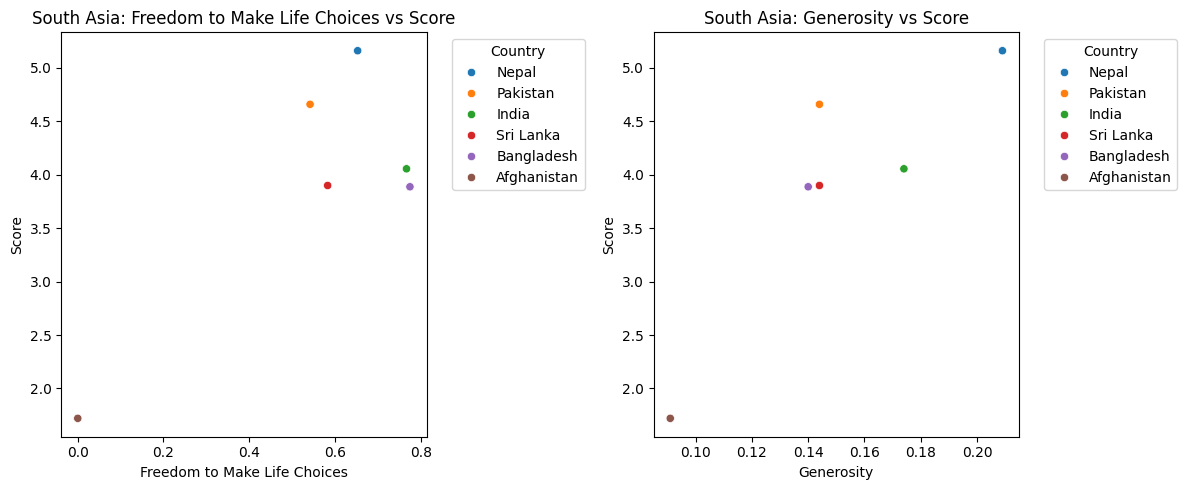

Middle East - Correlation with Freedom to Make Life Choices: 0.8632202433827544
Middle East - Correlation with Generosity: 0.6275236536964182


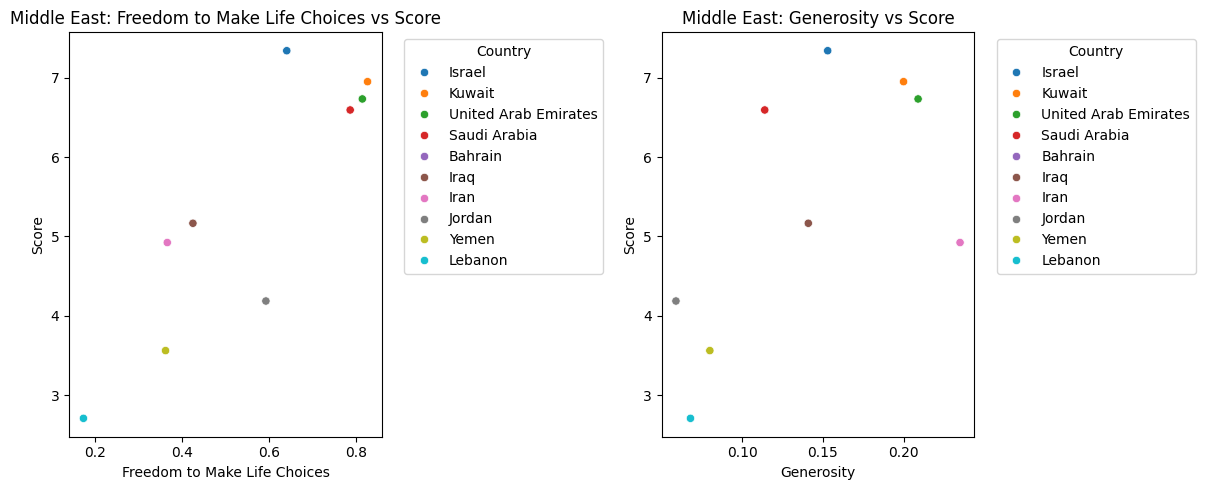

In [116]:
# Analyze for South Asia
analyze_correlation_with_colors(south_asia_data, 'South Asia')

# Analyze for Middle East
analyze_correlation_with_colors(middle_east_data, 'Middle East')

## Interpretation of Relationships Between Score and Other Metrics
**1. Freedom to Make Life Choices vs Score**

**South Asia:** Strong positive correlation (0.8005) – Freedom is a major driver of happiness.

**Middle East:** Even stronger positive correlation (0.8632) – Freedom has a greater impact on happiness than in South Asia.

**2. Generosity vs Score**

**South Asia: **Extremely strong positive correlation (0.8745) – Generosity is a dominant driver of happiness.

**Middle East:** Moderate positive correlation (0.6275) – Generosity has a weaker but still positive impact on happiness.

**3. Comparison**

**Freedom**: Middle East has a slightly stronger correlation (0.8632) than South Asia (0.8005).

**Generosity:** South Asia has a much stronger correlation (0.8745) than Middle East (0.6275).

### **6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [117]:
# Function to identify outliers using 1.5 * IQR rule
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers for South Asia
outliers_south_asia_score = identify_outliers(south_asia_data, 'score')
outliers_south_asia_gdp = identify_outliers(south_asia_data, 'Log GDP per capita')

# Identify outliers for Middle East
outliers_middle_east_score = identify_outliers(middle_east_data, 'score')
outliers_middle_east_gdp = identify_outliers(middle_east_data, 'Log GDP per capita')


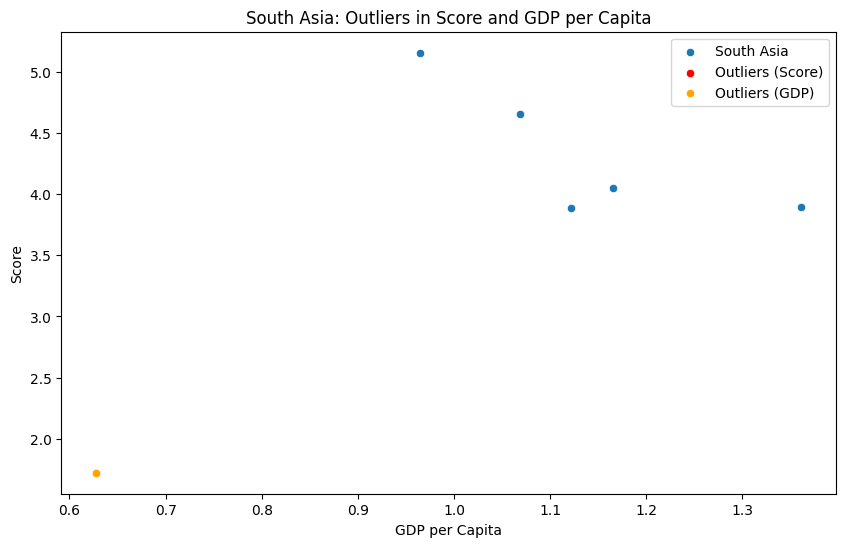

In [118]:
# Plot outliers for South Asia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia_score, color='red', label='Outliers (Score)')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_south_asia_gdp, color='orange', label='Outliers (GDP)')
plt.title('South Asia: Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

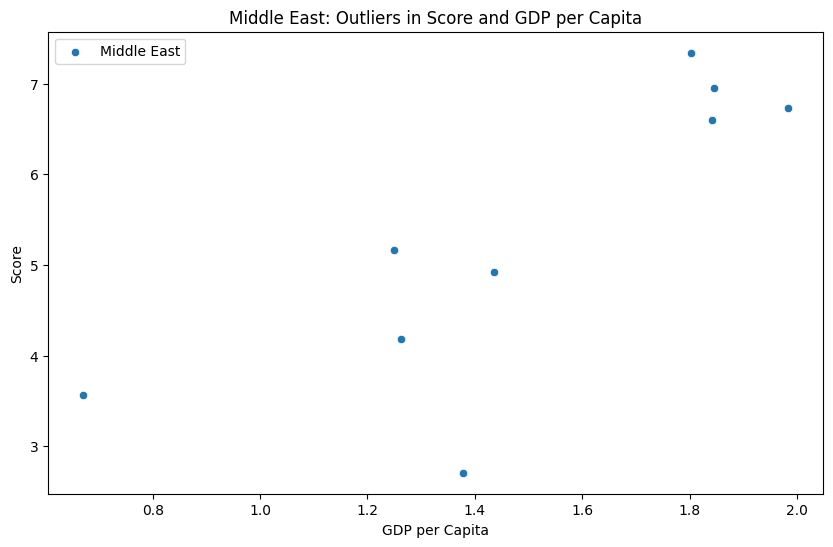

In [119]:
# Plot outliers for Middle East
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Middle East')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east_score, color='red', label='Outliers (Score)')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_middle_east_gdp, color='orange', label='Outliers (GDP)')
plt.title('Middle East: Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

## 7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

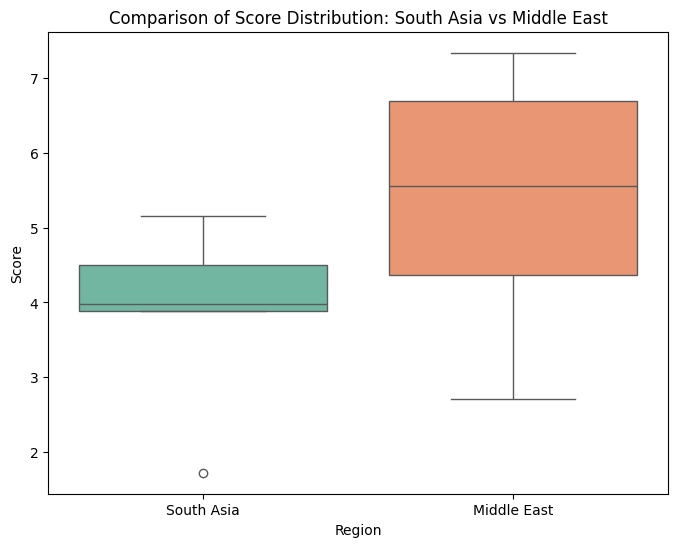

In [120]:
# Combine data for boxplot
combined_data = pd.DataFrame({
    'Region': ['South Asia'] * len(south_asia_data) + ['Middle East'] * len(middle_east_data),
    'Score': south_asia_data['score'].tolist() + middle_east_data['score'].tolist()
})

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Score', data=combined_data, hue='Region', palette='Set2', legend=False)
plt.title('Comparison of Score Distribution: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()

## Interpretation of Boxplots
### South Asia

**Median:** Around 5.0.

**Outliers**: A few countries with unusually high scores.

**Variability:** Narrow box, indicating less variability.


### Middle East

**Median:** Around 6.0.

**Outliers:** A few countries with unusually low scores.

**Variability:** Wider box, indicating greater variability.

**Comparison**

**Median:** Middle East has a higher median (6.0 vs. 5.0), indicating higher average happiness scores.

**Outliers:** South Asia has high-score outliers, while Middle East has low-score outliers.

**Variability:** Middle East shows greater variability in happiness scores.

**Implications**

**South Asia:** Some countries perform exceptionally well, but most have similar happiness scores.

**Middle East:** Greater variability and a higher average happiness score, but some countries struggle with low scores.